### Pytorch overview

python new_project.py {프로젝트명} # 프로젝트 새로 생성

python train.py -c config.json # MNIST dataset을 다운받아 실행까지 진행하게 된다

ngrok을 통해 colab과도 연동이 가능하다!

## Auto_grad Optimizer

딥러닝은 레이어의 연속이다!
- 이를 만들기 위한 torch의 가장 기본적인 class = nn.Module

- 딥러닝을 구성하는 layer의 base class
- input, output, forward, backward 정의
- 학습의 대상이 되는 파라미터 (tensor) 정의

### nn.Parameter
- 학습의 대상이 되는 가중치 값을 Parameter 클래스 안에 정의해준다
- Tensor 객체의 상속 객체
- nn.Module 내에 attribute가 될 때는 required_grad=True로 지정되어 학습 대상이 되는 Tensor
  - 즉, gradient를 계산할 수 있는 걸로 자동으로 지정되어 auto gradient의 대상이 된다.
- 우리가 직접 지정할 일은 잘 없다 -> 대부분의 레이어에는 가중치 값들이 정해져 있기 때문에

autograd_and_optimizer 참조

### Backward
- Layer에 있는 파라미터들의 미분을 수행
- Forward의 결과겂 (model의 output, 예측치)와 실제값간의 차이 (loss)에 대해 미분을 수행
  - 자동 미분 (requires_grad=True)으로 인해 연산이 되고 이때 backward라는 함수가 호출이 되면서 일어나게 된다
- 해당 값으로 파라미터 업데이트


### Backward from the scratch
- 실제 backward는 모듈 단계에서 직접 지정이 가능하다
- 모듈에서 backward와 optimizer 오버라이딩

## Dataset, dataloader

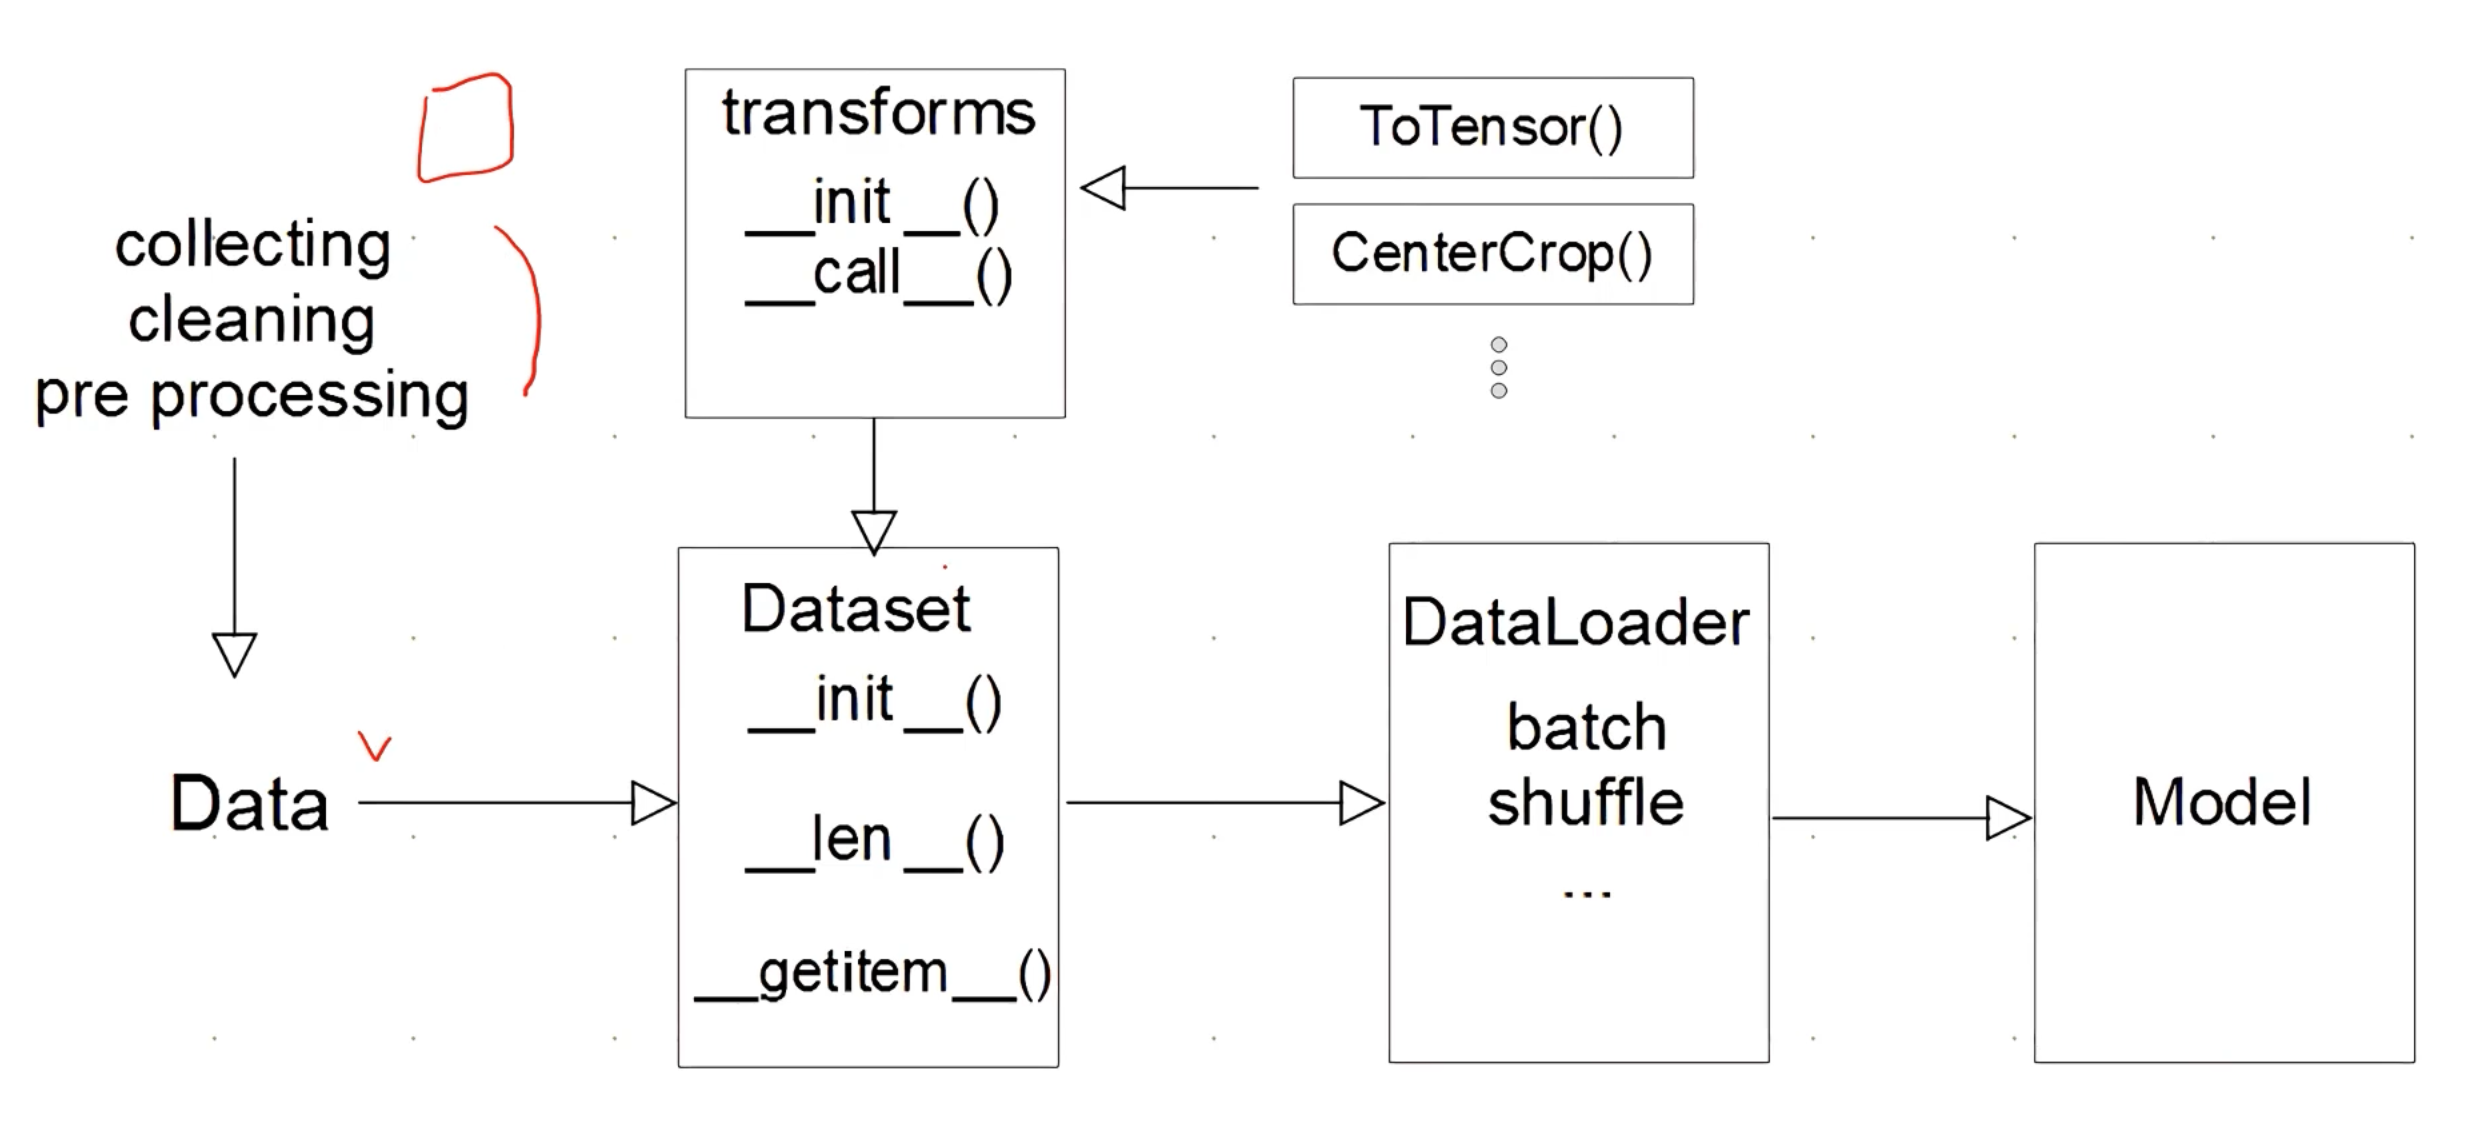

- Dataset
  - map_style : 어떤 데이터 스타일로 반환해줄 것인지 정의
- Transforms
  - 데이터 변형, 데이터 전처리, 데이터 tensor로 변환하는 과정 (ToTensor)
- DataLoader : 배치를 만들어주거나, 데이터 shuffle을 만드는 등 최종적으로 모델의 데이터가 들어갈 때 해당 Dataloader을 통해 생성된 데이터들이 들어간다

### dataset
- 데이터 입력 형태를 정의하는 클래스
- 데이터를 입력하는 방식의 표준화
- Image, Text, Audio 등에 따라 다른 입력 정의
- 하나의 데이터에 대해 정의를 하고 모든 데이터에 대해 적용하는 것

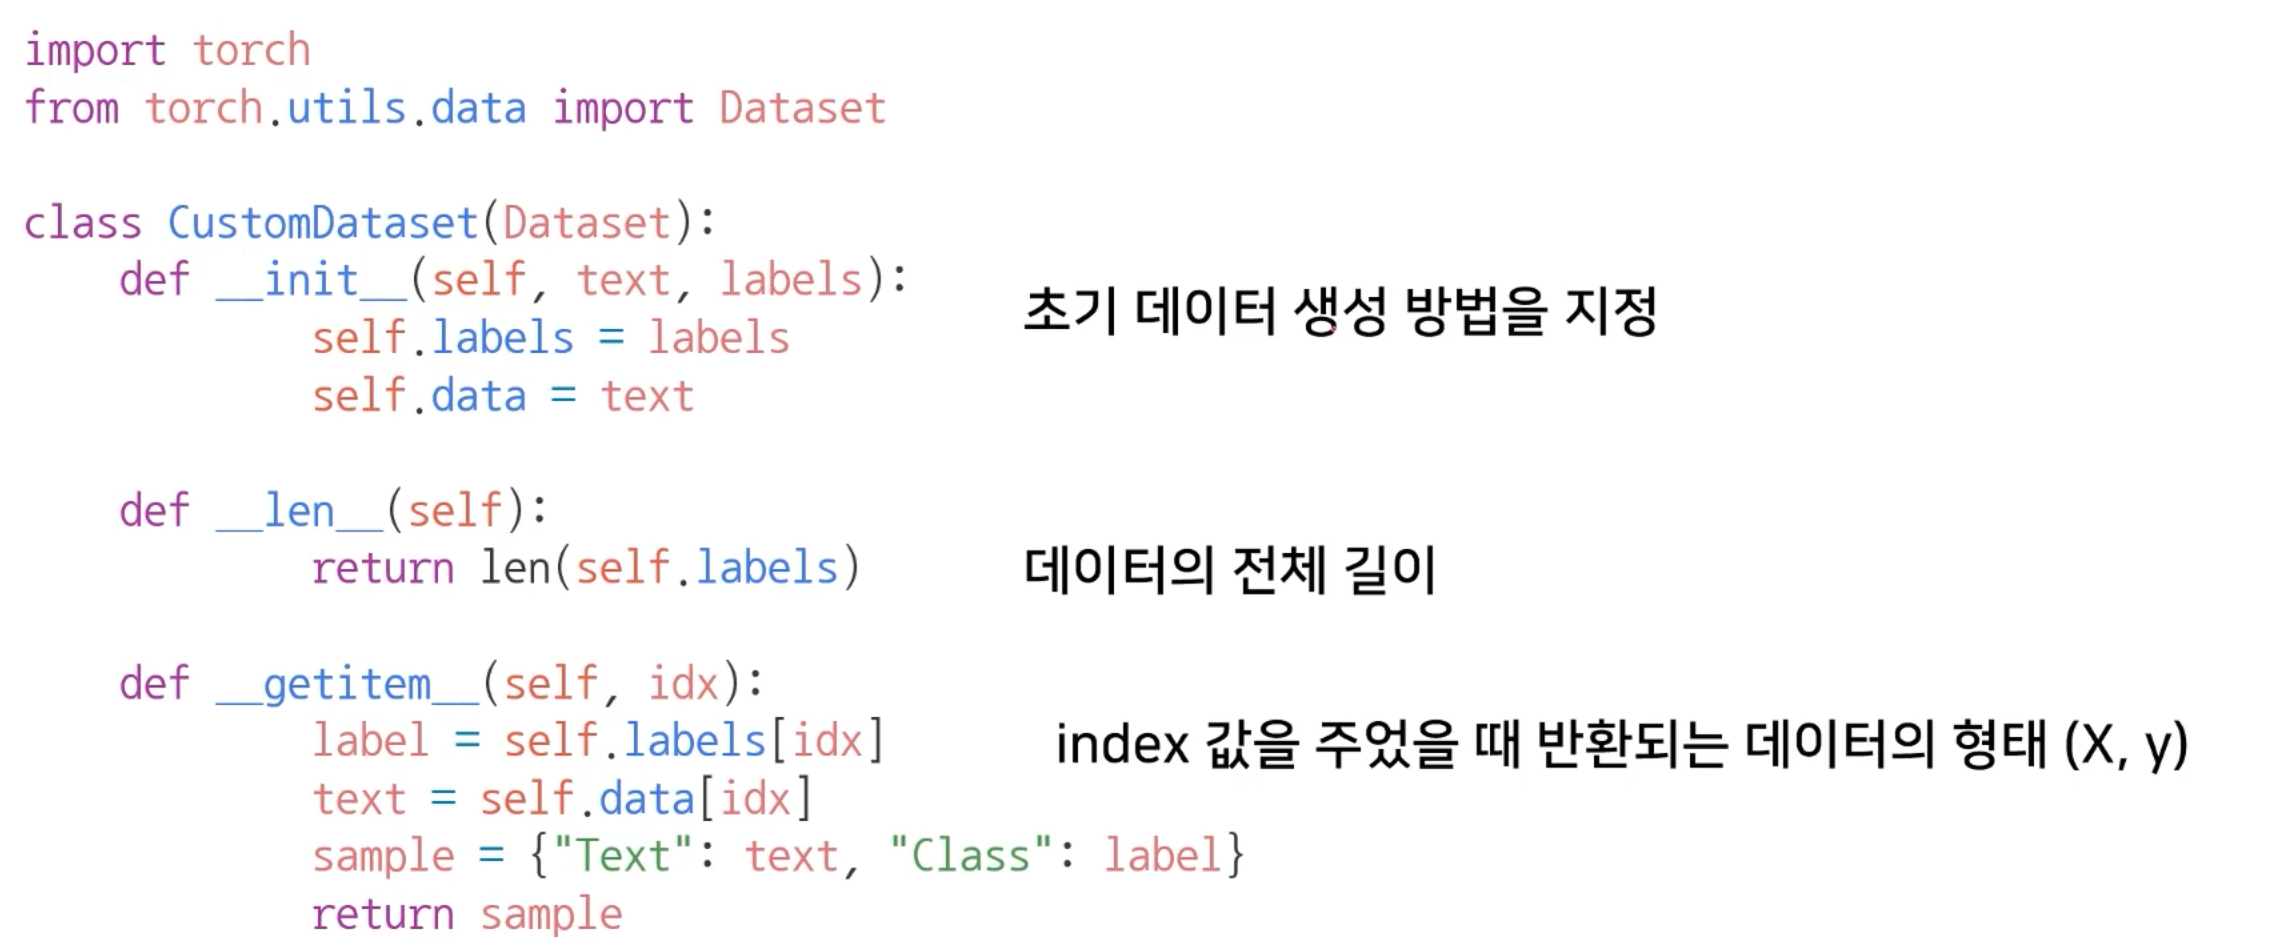

- init : 데이터의 경로를 정의

데이터셋 클래스 생성시 유의점
- 데이터 형태에 따라 각 함수를 다르게 정의한다
- 모든 것을 데이터 생성 시점에 처리하는 것이 아닌 필요한 시점에 변환을 한다
  - CPU에서는 Tensor로 변환해주고, GPU에서 Tensor로 변환된 거를 받아서 처리
- 데이터 셋에 대한 표준화된 처리 방법 제공 필요
- 최근에는 허깅페이스 등 표준화된 라이브러리 사용